In [105]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import glob
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MaxAbsScaler
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from time import time

# For the tree models
from sklearn.metrics import log_loss

from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
import warnings


#!pip install pydot

# For the tree visualization
import pydot
from IPython.display import Image
from six import StringIO
from sklearn.tree import export_graphviz

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GroupKFold
from sklearn.neighbors import KNeighborsClassifier

 
---



---



---
# **Human Activity Recognition by Smartphone & Smartwatch Kinematic Sensors**


---


---

---



Data set source:  WISDM Lab of Frodham University, NY

available from the UCI Machine Learning Repository

https://archive.ics.uci.edu/ml/datasets/WISDM+Smartphone+and+Smartwatch+Activity+and+Biometrics+Dataset+

For the source files of the dataset and additional background - see there.

**REMARK:**
I have detected the following apparent errors in these source files of the dataset:

The following feature columns are suspected to contain erronreous values:

'XSTANDDEV', 'YSTANDDEV', 'ZSTANDDEV', 'XVAR', 'YVAR', 'ZVAR'

The following files:

data_1611_accel_phone.arff - data_1617_accel_phone.arff

are all identical replicates on the file: data_1610_accel_phone.arff

---



### **Background summary on data collection method:**


---



Two kinds of devices:

1) Smartphone (Samsung Galaxy S5)

2) Smartwatch (LG G)

Two kinds of embedded kinematic sensors (for each device):

1) Accelerometer - for measurement of linear acceleration (m/sec^2)

**Remark:**

 It seems that the accelerometer doesn't, actually, measure the acceleration but rather the *force* exerted on it, calibrated per the mass of the device.
Hence, also while being in equilibrium state, (i.e. zero acceleration), the accelerometer outputs a vertical acceleration of 9.8 m/s^2, upwards.

2) Gyroscope - for measurement of angular velocity (rad/sec)



51 Participants

18 Physical Activities of daily living

*   Non hand oriented activities (leg):--->
{walking,
jogging, stairs, standing, kicking}
*   hand oriented activities:--->
{dribbling, playing catch, typing, writing, clapping,
brushing teeth, folding clothes}
*   Hand
oriented activities (eating):--->
{eating
pasta, eating soup, eating sandwich, eating
chips, drinking}

Each activity has been performed for the duration of 3 minutes

sensors sampling rate: 20 Hz (i.e. every 50 ms) - Only approximately - subject to OS constraints.

Number of raw measurements:  15,630,426

Device placement:

smartphone - placed in the participant's front right
pants leg pocket

smartwatch - wrapped on dominant hand

**Transformed, labeled, datasets:**


---


A sliding window approach is used to transform the time series data into a derived dataset of respective characterized, labeled data records, each of which describing a single time window data - window duration 10 sec (non overlapping)

Number of labled 10 sec window processed data records: 78,152 (51 x 3 x 60 x 20)

### Reference coordinate system definition:
---

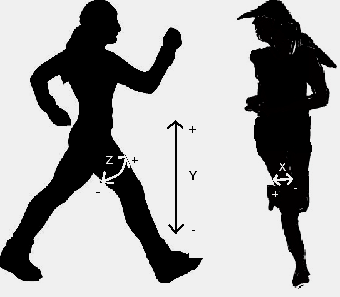

**Devices measurements reference axes (inferred from the raw data):**

---



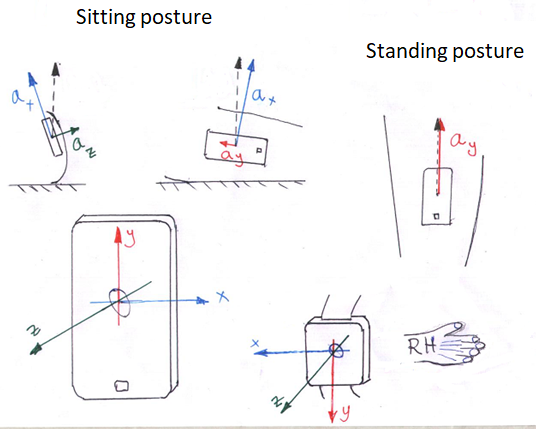

In [8]:
activity_codes_mapping = {'A': 'walking',
                          'D': 'sitting',
                          'E': 'standing',
                          'F': 'typing',
                          'J': 'eating',
                          'K': 'drinking',}

activity_color_map = {activity_codes_mapping['A']: 'lime',
                      activity_codes_mapping['D']: 'orange',
                      activity_codes_mapping['E']: 'yellow',
                      activity_codes_mapping['F']: 'lightgreen',
                      activity_codes_mapping['J']: 'cyan',
                      activity_codes_mapping['K']: 'purple',}

# features
features = ['ACTIVITY',
            'X0', # 1st bin fraction of x axis acceleration distribution
            'X1', # 2nd bin fraction ...
            'X2',
            'X3',
            'X4',
            'X5',
            'X6',
            'X7',
            'X8',
            'X9',
            'Y0', # 1st bin fraction of y axis acceleration distribution
            'Y1', # 2nd bin fraction ...
            'Y2',
            'Y3',
            'Y4',
            'Y5',
            'Y6',
            'Y7',
            'Y8',
            'Y9',
            'Z0', # 1st bin fraction of z axis acceleration distribution
            'Z1', # 2nd bin fraction ...
            'Z2',
            'Z3',
            'Z4',
            'Z5',
            'Z6',
            'Z7',
            'Z8',
            'Z9',
            'XAVG', # average sensor value over the window (per axis)
            'YAVG',
            'ZAVG',
            'XPEAK', # Time in milliseconds between the peaks in the wave associated with most activities. heuristically determined (per axis)
            'YPEAK',
            'ZPEAK',
            'XABSOLDEV', # Average absolute difference between the each of the 200 readings and the mean of those values (per axis)
            'YABSOLDEV',
            'ZABSOLDEV',
            'XSTANDDEV', # Standard deviation of the 200 window's values (per axis)  ***BUG!***
            'YSTANDDEV',
            'ZSTANDDEV',
            'XVAR', # Variance of the 200 window's values (per axis)   ***BUG!***
            'YVAR',
            'ZVAR',
            'XMFCC0', # short-term power spectrum of a wave, based on a linear cosine transform of a log power spectrum on a non-linear mel scale of frequency (13 values per axis)
            'XMFCC1',
            'XMFCC2',
            'XMFCC3',
            'XMFCC4',
            'XMFCC5',
            'XMFCC6',
            'XMFCC7',
            'XMFCC8',
            'XMFCC9',
            'XMFCC10',
            'XMFCC11',
            'XMFCC12',
            'YMFCC0', # short-term power spectrum of a wave, based on a linear cosine transform of a log power spectrum on a non-linear mel scale of frequency (13 values per axis)
            'YMFCC1',
            'YMFCC2',
            'YMFCC3',
            'YMFCC4',
            'YMFCC5',
            'YMFCC6',
            'YMFCC7',
            'YMFCC8',
            'YMFCC9',
            'YMFCC10',
            'YMFCC11',
            'YMFCC12',
            'ZMFCC0', # short-term power spectrum of a wave, based on a linear cosine transform of a log power spectrum on a non-linear mel scale of frequency (13 values per axis)
            'ZMFCC1',
            'ZMFCC2',
            'ZMFCC3',
            'ZMFCC4',
            'ZMFCC5',
            'ZMFCC6',
            'ZMFCC7',
            'ZMFCC8',
            'ZMFCC9',
            'ZMFCC10',
            'ZMFCC11',
            'ZMFCC12',
            'XYCOS', # The cosine distances between sensor values for pairs of axes (three pairs of axes)
            'XZCOS',
            'YZCOS',
            'XYCOR', # The correlation between sensor values for pairs of axes (three pairs of axes)
            'XZCOR',
            'YZCOR',
            'RESULTANT', # Average resultant value, computed by squaring each matching x, y, and z value, summing them, taking the square root, and then averaging these values over the 200 readings
            'PARTICIPANT'] # Categirical: 1600 -1650

len(features)

93

In [106]:
#the duplicate files to be ignored; all identical to 1600
duplicate_files = [str(i) for i in range(1611, 1618)] # '1611',...'1617'

path = r'wisdm/wisdm-dataset/wisdm-dataset/arff_files/watch/accel'
all_files = glob.glob(path + "/*.arff")

list_dfs_phone_accel = []

for filename in all_files:

    if any(dup_fn in filename for dup_fn in duplicate_files):
        continue #ignore the duplicate files
    df = pd.read_csv(filename, names = features, skiprows = 96, index_col=None, header=0)
    list_dfs_phone_accel.append(df)

all_phone_accel = pd.concat(list_dfs_phone_accel, axis=0, ignore_index=True, sort=False)

all_phone_accel = all_phone_accel[all_phone_accel.iloc[:, 0].isin(['A', 'D', 'E', 'F', 'J', 'K'])]
all_phone_accel

,ACTIVITY,X0,X1,X2,X3,X4,X5,X6,X7,X8,...,ZMFCC11,ZMFCC12,XYCOS,XZCOS,YZCOS,XYCOR,XZCOR,YZCOR,RESULTANT,PARTICIPANT
0,A,0.00,0.000,0.010,0.050,0.230,0.185,0.125,0.160,0.120,...,0.511396,0.504824,-0.653107,-0.177665,0.047484,-0.128490,-0.172721,-0.044635,12.90690,1604
1,A,0.00,0.005,0.045,0.060,0.185,0.175,0.130,0.125,0.145,...,0.494735,0.488377,-0.650797,-0.147216,0.100347,-0.185259,-0.439753,0.170373,12.92930,1604
2,A,0.00,0.025,0.040,0.060,0.160,0.180,0.110,0.170,0.120,...,0.509960,0.503407,-0.620292,-0.136585,0.185728,-0.245739,-0.443186,0.280749,12.99140,1604
3,A,0.00,0.000,0.000,0.080,0.185,0.155,0.140,0.120,0.120,...,0.434896,0.429308,-0.634005,-0.277457,-0.013385,-0.081120,-0.215224,-0.210576,13.34430,1604
4,A,0.00,0.000,0.000,0.035,0.175,0.245,0.175,0.100,0.135,...,0.413204,0.407894,-0.660106,-0.167239,0.020139,-0.001829,-0.190008,-0.078624,12.91970,1604
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16141,K,1.00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.287650,0.283954,0.970449,0.320037,0.536923,-0.886916,-0.968035,0.959208,9.85425,1608
16142,K,1.00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.266859,0.263430,0.950138,0.103545,0.292897,-0.903975,-0.568098,0.623870,9.84500,1608
16143,K,0.62,0.155,0.160,0.055,0.010,0.000,0.000,0.000,0.000,...,0.517949,0.511294,0.695925,0.159822,0.088311,0.291992,0.280011,0.382121,9.99836,1608
16144,K,0.84,0.045,0.010,0.095,0.010,0.000,0.000,0.000,0.000,...,0.454865,0.449020,0.865799,0.429432,0.162165,0.581008,0.773190,0.539199,9.86740,1608


In [112]:
all_phone_accel_breakpoint = all_phone_accel.copy()
all_phone_accel['ACTIVITY'].map(activity_codes_mapping).value_counts()

# The following columns:'XSTANDDEV',	'YSTANDDEV',	'ZSTANDDEV'	,'XVAR',	'YVAR',	'ZVAR' are suspected to contain erroneous data: ( e.g. absolute deviation is not of the same order of magnitude of standard deviation; variance is not the square of standard deviation !!!)
all_phone_accel[['XABSOLDEV', 'YABSOLDEV','ZABSOLDEV','XSTANDDEV', 'YSTANDDEV', 'ZSTANDDEV', 'XVAR', 'YVAR', 'ZVAR']].head()
all_phone_accel.drop(['XSTANDDEV','YSTANDDEV','ZSTANDDEV','XVAR','YVAR','ZVAR'], axis = 1, inplace = True)



---



# **Preprocessing of Input Dataset:**

---



In [113]:
all_phone_accel.drop('PARTICIPANT', axis = 1, inplace = True)

from sklearn.model_selection import train_test_split

y = all_phone_accel.ACTIVITY
X = all_phone_accel.drop('ACTIVITY', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size = 0.75, 
                                                    test_size = 0.25,
                                                    shuffle = True, 
                                                    stratify = all_phone_accel.ACTIVITY)

X_train.insert(0, 'Y', y_train)
print(X_train)

X_train.drop(['Y'], axis = 1, inplace = True)

# scaling the data
scaling_transformer = MaxAbsScaler().fit(X_train[['XAVG', 'YAVG', 'ZAVG', 'XPEAK', 'YPEAK', 'ZPEAK', 'XABSOLDEV', 'YABSOLDEV', 'ZABSOLDEV', 'RESULTANT']])
X_train[['XAVG', 'YAVG', 'ZAVG', 'XPEAK', 'YPEAK', 'ZPEAK', 'XABSOLDEV', 'YABSOLDEV', 'ZABSOLDEV', 'RESULTANT']] = scaling_transformer.transform(X_train[['XAVG', 'YAVG', 'ZAVG', 'XPEAK', 'YPEAK', 'ZPEAK', 'XABSOLDEV', 'YABSOLDEV', 'ZABSOLDEV', 'RESULTANT']])
X_test = X_test.copy()
X_test[['XAVG', 'YAVG', 'ZAVG', 'XPEAK', 'YPEAK', 'ZPEAK', 'XABSOLDEV', 'YABSOLDEV', 'ZABSOLDEV', 'RESULTANT']] = scaling_transformer.transform(X_test[['XAVG', 'YAVG', 'ZAVG', 'XPEAK', 'YPEAK', 'ZPEAK', 'XABSOLDEV', 'YABSOLDEV', 'ZABSOLDEV', 'RESULTANT']])
X_test.reset_index(drop = True, inplace = True)
y_train.reset_index(drop = True, inplace = True)
y_test.reset_index(drop = True, inplace = True)


       Y     X0     X1     X2     X3     X4     X5    X6    X7    X8  ...  \
14804  J  0.000  0.735  0.265  0.000  0.000  0.000  0.00  0.00  0.00  ...   
8146   F  0.000  0.195  0.785  0.020  0.000  0.000  0.00  0.00  0.00  ...   
14824  K  0.090  0.160  0.440  0.300  0.005  0.005  0.00  0.00  0.00  ...   
1121   K  1.000  0.000  0.000  0.000  0.000  0.000  0.00  0.00  0.00  ...   
15127  J  0.115  0.885  0.000  0.000  0.000  0.000  0.00  0.00  0.00  ...   
...   ..    ...    ...    ...    ...    ...    ...   ...   ...   ...  ...   
8119   D  0.000  0.000  1.000  0.000  0.000  0.000  0.00  0.00  0.00  ...   
13710  D  0.000  0.000  0.000  1.000  0.000  0.000  0.00  0.00  0.00  ...   
3811   A  0.055  0.010  0.010  0.005  0.105  0.295  0.18  0.15  0.15  ...   
12352  F  0.105  0.800  0.090  0.005  0.000  0.000  0.00  0.00  0.00  ...   
9347   J  0.255  0.570  0.175  0.000  0.000  0.000  0.00  0.00  0.00  ...   

        ZMFCC10   ZMFCC11   ZMFCC12     XYCOS     XZCOS     YZCOS     XYCOR

---
# **Application of Machine Learning Classification Models:**

---

{'leaf_size': 20, 'n_neighbors': 5}
          walking  sitting  standing  typing  eating  drinking
walking       223        2         0       0       1         0
sitting         8      180         8      19      10         5
standing       11       10       201       4       5         4
typing          1        2         4     210       2         1
eating          2        7         0       8     194         6
drinking        0        8         2       4      19       201
                 0
walking   0.986726
sitting   0.782609
standing  0.855319
typing    0.954545
eating    0.894009
drinking  0.858974
              precision    recall  f1-score   support

           A       0.91      0.99      0.95       226
           D       0.86      0.78      0.82       230
           E       0.93      0.86      0.89       235
           F       0.86      0.95      0.90       220
           J       0.84      0.89      0.87       217
           K       0.93      0.86      0.89       234

    accura

/var/folders/p7/20f7xrt504ncpy6nhf4tjw480000gn/T/ipykernel_73748/402881560.py:48: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  accuracy_per_activity = pd.DataFrame([cm_act.iloc[i][i]/np.sum(cm_act.iloc[i]) for i in range(6)],index=activity_codes_mapping.values())


0.8876651982378855

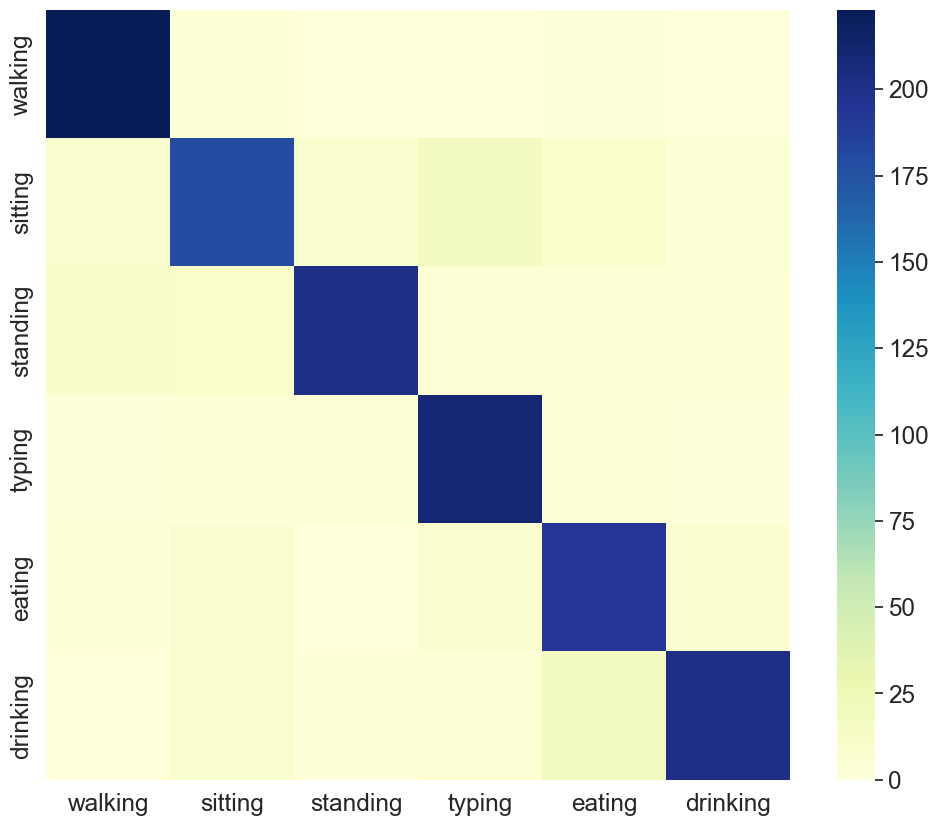

In [14]:
my_cv = StratifiedShuffleSplit(n_splits=5, train_size=0.7, test_size=0.3)

knn_classifier = KNeighborsClassifier()
my_param_grid = {'n_neighbors': [5, 10, 20], 'leaf_size': [20, 30, 40]}
knn_model_gs = GridSearchCV(estimator = knn_classifier, 
                            param_grid = my_param_grid,
                            cv = my_cv, 
                            scoring ='accuracy')

knn_model_gs.fit(X_train, y_train)

knn_best_classifier = knn_model_gs.best_estimator_

print(knn_model_gs.best_params_)

knn_model_gs.cv_results_

knn_best_classifier.get_params()

scores = cross_val_score(knn_best_classifier, X_train, y_train, cv=my_cv, scoring='accuracy')
list(scores)

# Applying model to train set first, just to verify that there is no substantial overfitting
y_train_pred=knn_best_classifier.predict(X_train)

accuracy_score(y_true=y_train, y_pred=y_train_pred)

y_test_pred = knn_best_classifier.predict(X_test)

cm = confusion_matrix(y_true=y_test,
                      y_pred=y_test_pred)
    
cm_act = pd.DataFrame(cm,
                      index = knn_best_classifier.classes_,
                      columns = knn_best_classifier.classes_)

cm_act.columns = activity_codes_mapping.values()
cm_act.index = activity_codes_mapping.values()
print(cm_act)

sns.set(font_scale=1.6)
fig, ax = plt.subplots(figsize=(12,10))
_ = sns.heatmap(cm_act, cmap="YlGnBu")
plt.savefig('knn_confusion_matrix.svg')

sns.set(font_scale=1.2)

accuracy_per_activity = pd.DataFrame([cm_act.iloc[i][i]/np.sum(cm_act.iloc[i]) for i in range(6)],index=activity_codes_mapping.values())
print(accuracy_per_activity)

print(classification_report(y_true=y_test,
                            y_pred=y_test_pred))

accuracy_score(y_true = y_test, y_pred = y_test_pred)

In [15]:
y_test

0       J
1       A
2       D
3       F
4       J
       ..
1357    E
1358    J
1359    F
1360    A
1361    A
Name: ACTIVITY, Length: 1362, dtype: object

In [16]:
pd.DataFrame(y_test_pred)

,0
0,J
1,A
2,F
3,F
4,J
...,...
1357,E
1358,J
1359,F
1360,A




---



# **Load Local Data:**

---



In [63]:
input_file = 'local/1500_0715/data.csv'

df = pd.read_csv(input_file, names = features)

# drop the first two columns and the last seven columns
df.drop(df.columns[[0, 1, 2,  6, 7, 8, 9,10,11]], axis = 1, inplace = True)

df

,X2,X3,X4,Y1,Y2,Y3,Y4,Y5,Y6,Y7,...,ZMFCC11,ZMFCC12,XYCOS,XZCOS,YZCOS,XYCOR,XZCOR,YZCOR,RESULTANT,PARTICIPANT
0,加速度Y(g),加速度Z(g),角速度X(°/s),NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.955,0.113,-1.282,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.955,0.113,-1.282,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.957,0.112,-1.221,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.957,0.112,-1.221,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7246,0.555,0.164,2.319,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7247,0.555,0.164,2.319,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7248,0.556,0.163,1.831,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7249,0.556,0.163,1.831,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [121]:
raw_par_20_watch_accel = pd.read_csv(r'wisdm/wisdm-dataset/wisdm-dataset/raw/watch/accel/data_1600_accel_watch.txt', names = ['participant_id' , 'activity_code' , 'timestamp', 'x', 'y', 'z'], index_col=None, header=None)

raw_par_20_watch_accel.z = raw_par_20_watch_accel.z.str.strip(';')
raw_par_20_watch_accel.z = pd.to_numeric(raw_par_20_watch_accel.z)

def calculate_bins(data, num_bins=10):
    min_val = data.min()
    max_val = data.max()
    range_val = max_val - min_val
    
    bins = np.linspace(min_val, max_val, num_bins + 1)
    
    # Use pandas cut to bin data and calculate the histogram
    binned_data = pd.cut(data, bins=bins, include_lowest=True, labels=False)
    bin_counts = binned_data.value_counts(sort=False, normalize=True)
    
    return bin_counts.sort_index()

# Applying the function to each axis
x_bins = calculate_bins(raw_par_20_watch_accel['x'][:200])
y_bins = calculate_bins(raw_par_20_watch_accel['y'][:200])
z_bins = calculate_bins(raw_par_20_watch_accel['z'][:200])

print("X-axis Binned Distribution:\n", x_bins)
print("Y-axis Binned Distribution:\n", y_bins)
print("Z-axis Binned Distribution:\n", z_bins)

X-axis Binned Distribution:
 x
0    0.030
1    0.030
2    0.105
3    0.140
4    0.110
5    0.165
6    0.155
7    0.115
8    0.060
9    0.090
Name: proportion, dtype: float64
Y-axis Binned Distribution:
 y
0    0.015
1    0.010
2    0.015
3    0.065
4    0.220
5    0.295
6    0.260
7    0.075
8    0.035
9    0.010
Name: proportion, dtype: float64
Z-axis Binned Distribution:
 z
0    0.015
1    0.095
2    0.330
3    0.330
4    0.125
5    0.040
6    0.015
7    0.015
8    0.015
9    0.020
Name: proportion, dtype: float64


In [118]:
raw_par_20_watch_accel['x'][:200]

0       7.091625
1       4.972757
2       3.253720
3       2.801216
4       3.770868
         ...    
195    10.572795
196     9.303867
197     6.215348
198     7.783550
199    10.766725
Name: x, Length: 200, dtype: float64



---



# **Visualization:**

---



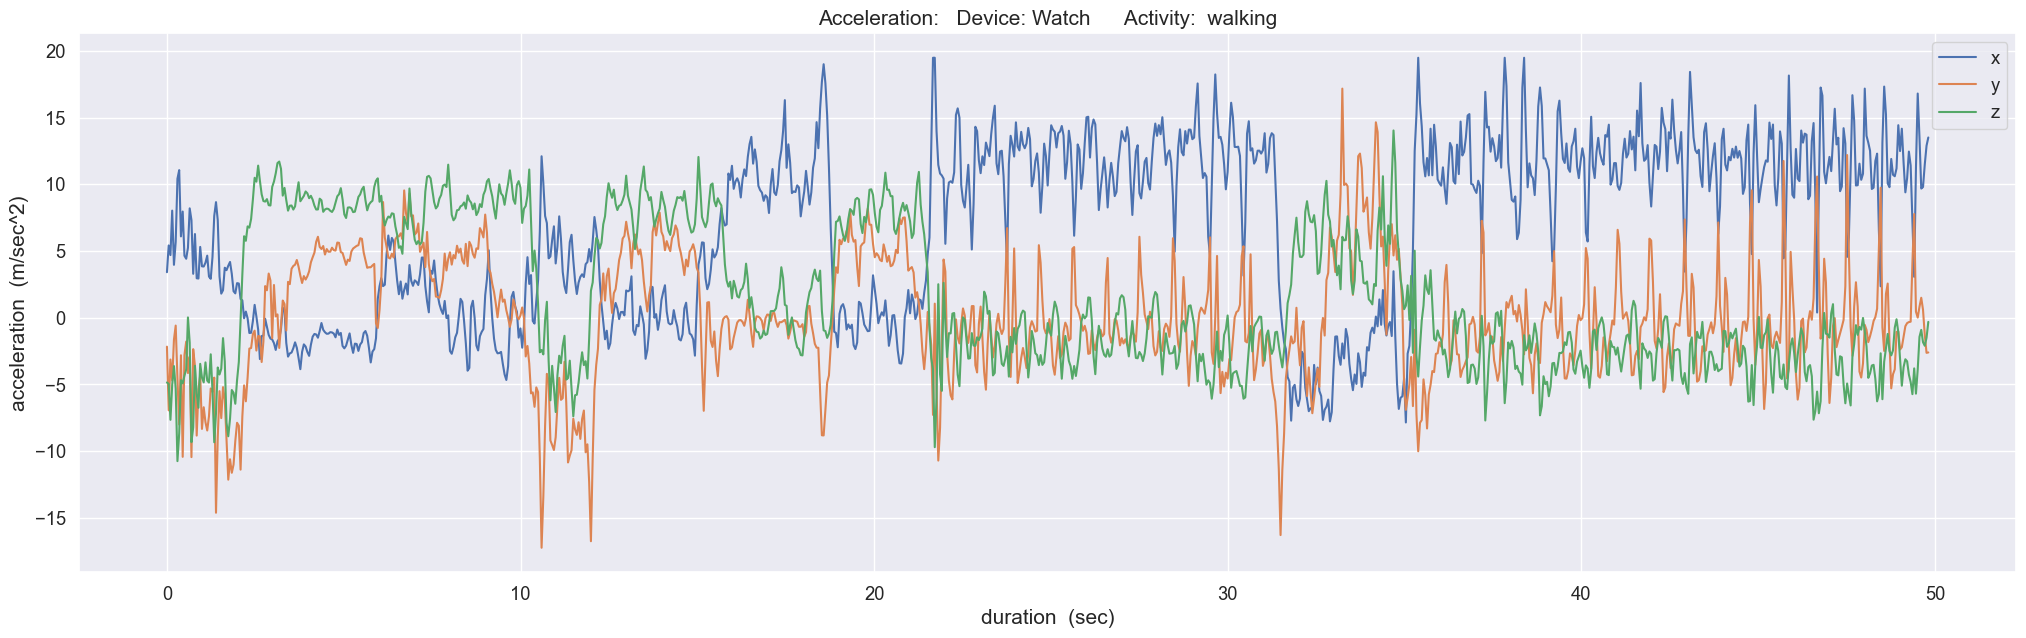

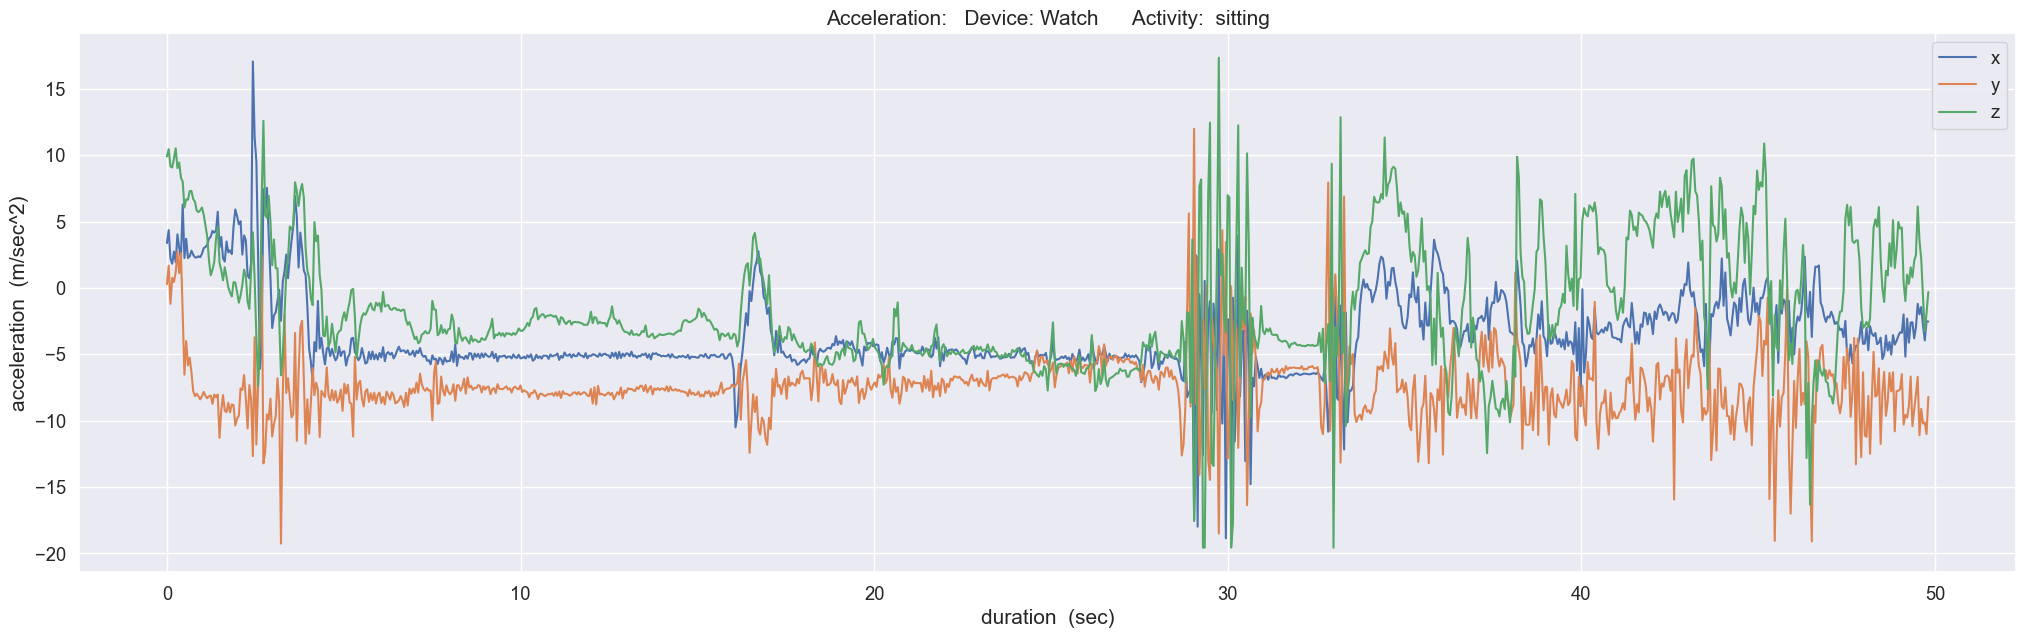

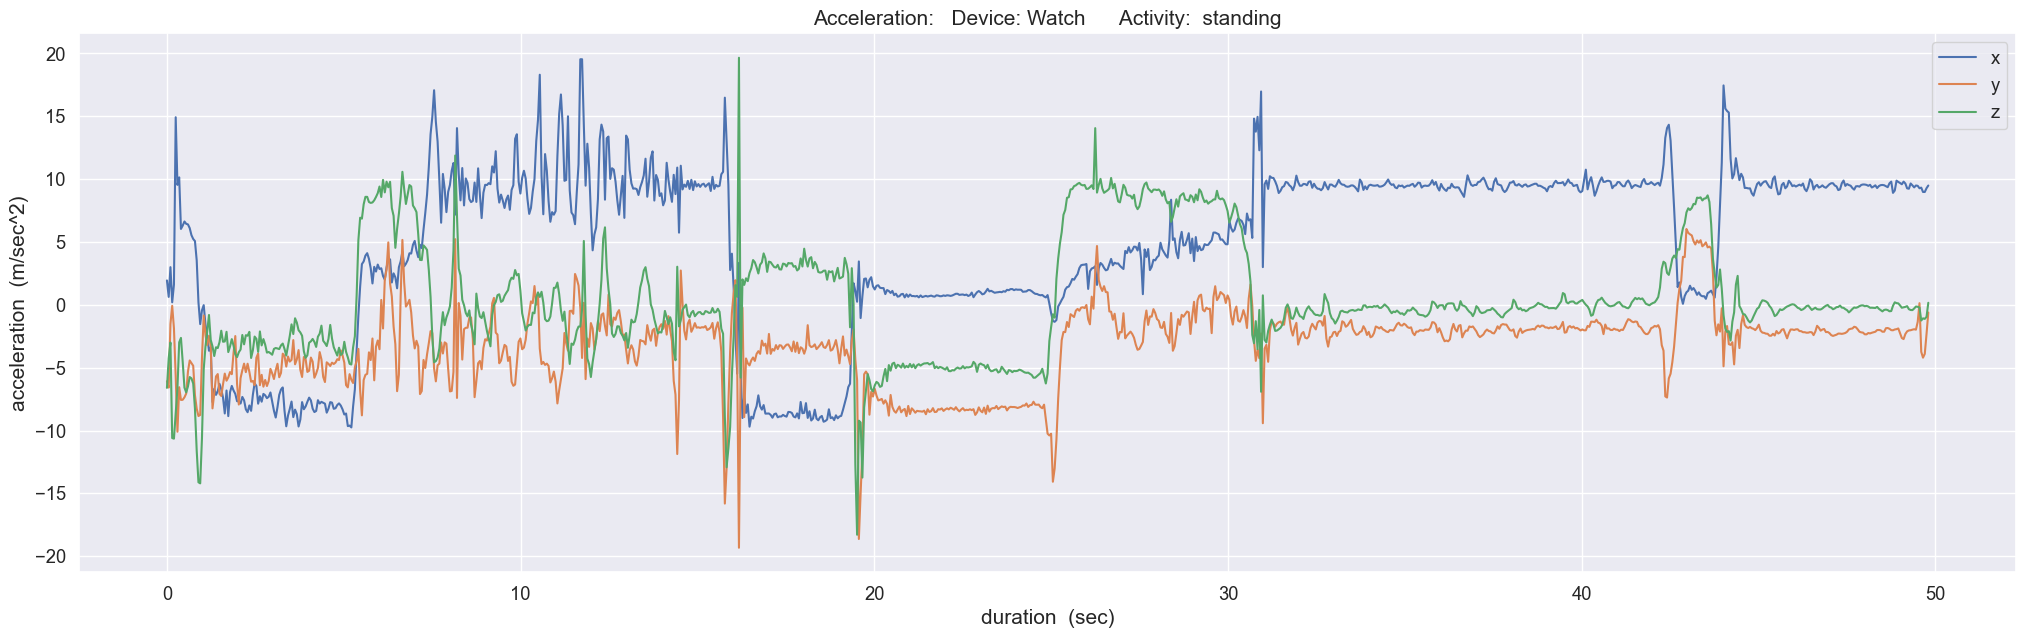

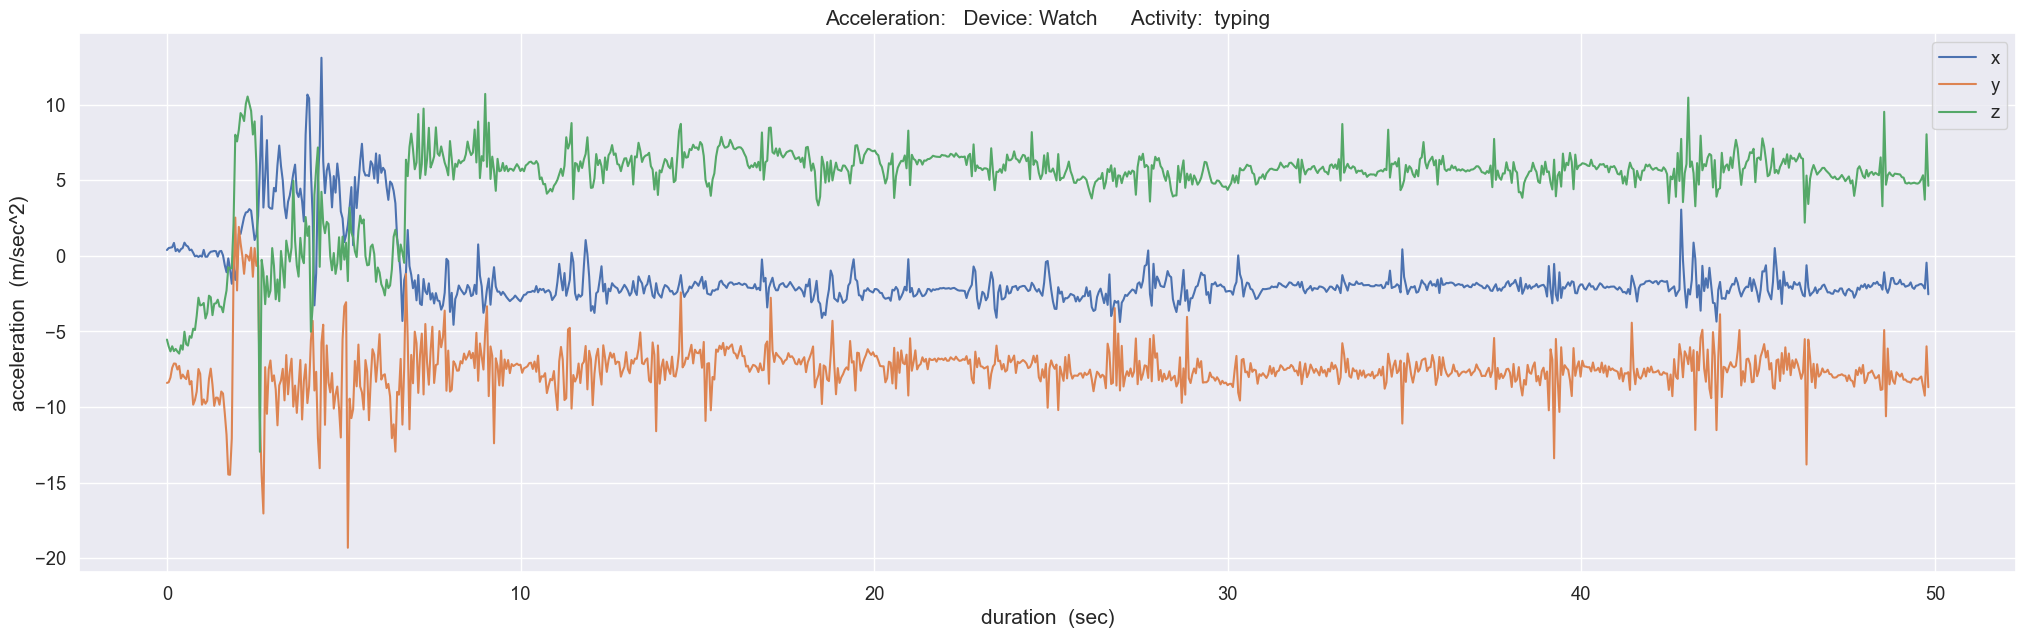

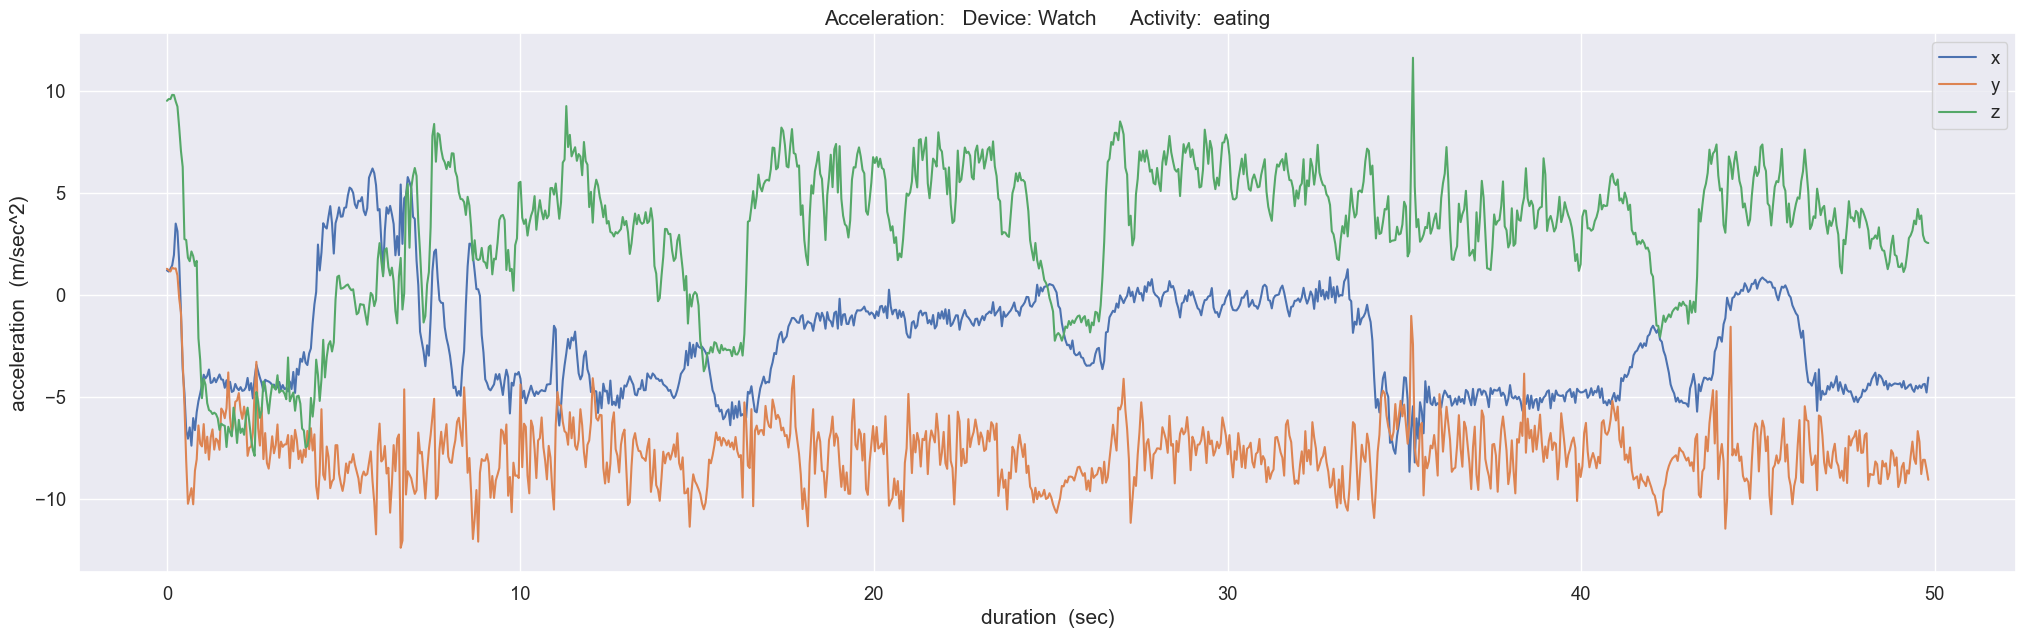

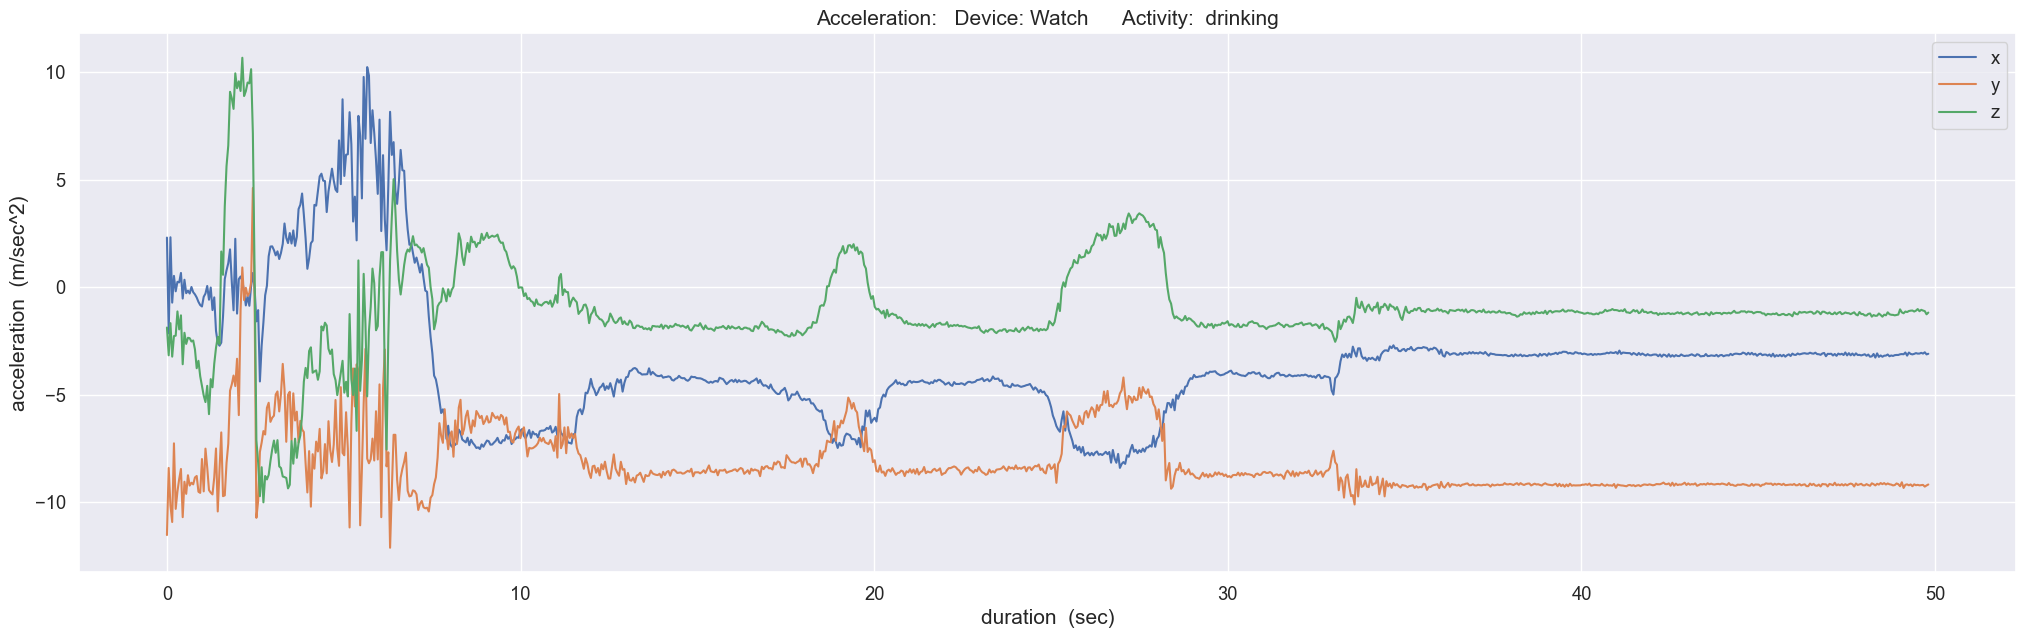

In [108]:
def show_accel_per_activity(device, df, act, interval_in_sec = None):
  ''' Plots acceleration time history per activity '''

  df1 = df.loc[df.activity == act].copy()
  df1.reset_index(drop = True, inplace = True)

  df1['duration'] = (df1['timestamp'] - df1['timestamp'].iloc[0])/1000000000 # nanoseconds --> seconds

  if interval_in_sec == None:
    ax = df1[:].plot(kind='line', x='duration', y=['x','y','z'], figsize=(25,7), grid = True) # ,title = act)
  else:
    ax = df1[:interval_in_sec*20].plot(kind='line', x='duration', y=['x','y','z'], figsize=(25,7), grid = True) # ,title = act)

  ax.set_xlabel('duration  (sec)', fontsize = 15)
  ax.set_ylabel('acceleration  (m/sec^2)',fontsize = 15)
  ax.set_title('Acceleration:   Device: ' + device + '      Activity:  ' + act, fontsize = 15)



raw_par_20_watch_accel = pd.read_csv(r'wisdm/wisdm-dataset/wisdm-dataset/raw/watch/accel/data_1620_accel_watch.txt', names = ['participant_id' , 'activity_code' , 'timestamp', 'x', 'y', 'z'], index_col=None, header=None)

raw_par_20_watch_accel.z = raw_par_20_watch_accel.z.str.strip(';')
raw_par_20_watch_accel.z = pd.to_numeric(raw_par_20_watch_accel.z)

raw_par_20_watch_accel['activity'] = raw_par_20_watch_accel['activity_code'].map(activity_codes_mapping)

raw_par_20_watch_accel = raw_par_20_watch_accel[['participant_id', 'activity_code', 'activity', 'timestamp', 'x', 'y', 'z']]

raw_par_20_watch_accel

for key in activity_codes_mapping:
  show_accel_per_activity('Watch', raw_par_20_watch_accel, activity_codes_mapping[key], 50)